# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
import json
import random
import matplotlib.pyplot as plt
import scipy.stats as st
import requests
import pandas as pd
from citipy import citipy
from config import api_key

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
clean_city_data = "../WeatherPy/Data/clean_city_data.csv"
clean_city_data = pd.read_csv(clean_city_data)
clean_city_data


,Unnamed: 0,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,City
0,0,-33.5906,26.8910,12.17,75,100,10.42,ZA,1626831878,port alfred
1,1,54.0359,19.0266,14.93,94,48,3.29,PL,1626831879,malbork
2,2,-34.5322,20.0403,6.62,81,53,2.57,ZA,1626831879,bredasdorp
3,3,-0.7393,-90.3518,22.53,94,100,3.13,EC,1626831879,puerto ayora
4,4,-37.8333,140.7667,9.95,81,90,4.63,AU,1626831880,mount gambier
...,...,...,...,...,...,...,...,...,...,...
668,668,36.2970,59.6062,23.08,40,0,3.09,IR,1626832112,mashhad
669,669,13.6017,26.6876,28.33,52,100,5.97,SD,1626832113,umm kaddadah
670,670,41.6892,122.1128,28.08,75,74,5.31,CN,1626832113,heishan
671,671,41.9301,2.2549,24.06,66,11,0.89,ES,1626832114,vic


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

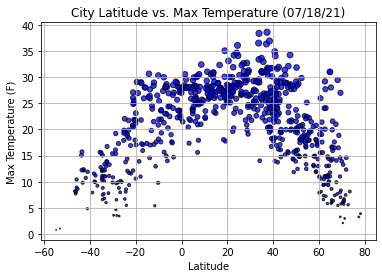

In [48]:
#Pulling in the data
latitude = clean_city_data["Lat"]
temperature = clean_city_data["Max Temp"]

#Regression
py_slope, py_int, py_r, py_p, py_std_err = st.linregress(latitude, temperature)
py_fit = py_slope * latitude + py_int

#Building the Plot
plt.scatter(latitude, temperature, marker="o", facecolors="blue", edgecolors="black",
              s=temperature, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.title("City Latitude vs. Max Temperature (07/18/21)")

plt.savefig("LatTemp.png", bbox_inches='tight', dpi=600)

#This chart displays the relationship between the maximum temperature in each city and its distance from the equator. 
#The further you go from the equator (0 latitude) in either direction, the lower the max temperature. That is proven in this chart.

## Latitude vs. Humidity Plot

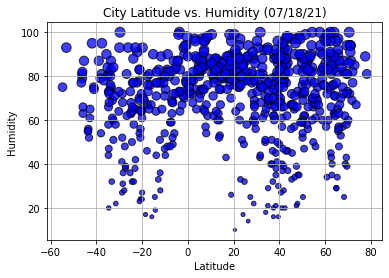

In [55]:
latitude = clean_city_data["Lat"]
humid = clean_city_data["Humidity"]

py_slope, py_int, py_r, py_p, py_std_err = st.linregress(latitude, humid)
py_fit = py_slope * latitude + py_int

plt.scatter(latitude, humid, marker="o", facecolors="blue", edgecolors="black",
              s=humid, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)
plt.title("City Latitude vs. Humidity (07/18/21)")

plt.savefig("LatHumid.png", bbox_inches='tight', dpi=600)

#This chart displays the relationship between the humidity in each city and its latitude. 
#There does not seem to be a clear relationship between humidity and latitude, as  the chart is very spread out. 
#However, there is a dense cluster of cities with high humidity between latitudes of 0 and 20

## Latitude vs. Cloudiness Plot

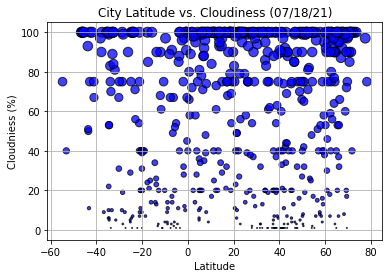

In [56]:
latitude = clean_city_data["Lat"]
cloudiness = clean_city_data["Cloudiness"]

py_slope, py_int, py_r, py_p, py_std_err = st.linregress(latitude, cloudiness)
py_fit = py_slope * latitude + py_int

plt.scatter(latitude, cloudiness, marker="o", facecolors="blue", edgecolors="black",
              s=cloudiness, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudniess (%)")
plt.grid(True)
plt.title("City Latitude vs. Cloudiness (07/18/21)")

plt.savefig("LatCloud.png", bbox_inches='tight', dpi=600)

#This chart displays the relationship between the cloudiness in each city and its latitude. 
#There does not seem to be a clear relationship between cloudiness and latitude, as  the chart is very spread out. 
#However, there are dense clusters of cities with cloudiness levels of 100 at all latitudes.

## Latitude vs. Wind Speed Plot

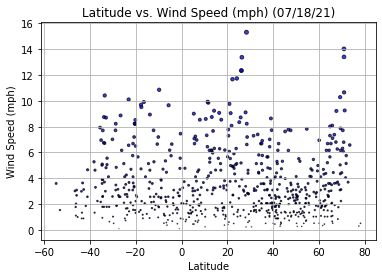

In [57]:
latitude = clean_city_data["Lat"]
wind = clean_city_data["Wind Speed"]

py_slope, py_int, py_r, py_p, py_std_err = st.linregress(latitude, wind)
py_fit = py_slope * latitude + py_int

plt.scatter(latitude, wind, marker="o", facecolors="blue", edgecolors="black",
              s=wind, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.title("Latitude vs. Wind Speed (mph) (07/18/21)")

plt.savefig("LatWind.png", bbox_inches='tight', dpi=600)

#This chart displays the relationship between the wind speed in each city and its latitude. 
#There does not seem to be a clear relationship between wind speed and latitude, as  the chart is very spread out.
#The vast majority of wind speeds are below 8mph

## Linear Regression

In [11]:
n_hem = clean_city_data[clean_city_data['Lat'] >= 0]
s_hem = clean_city_data[clean_city_data['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient between Max Temp and Latitude Linear Regression is -0.64


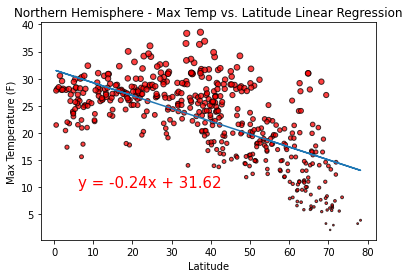

In [58]:
max_n = n_hem["Max Temp"]
lat_n = n_hem["Lat"]

py_slope, py_int, py_r, py_p, py_std_err = st.linregress(lat_n, max_n)
py_fit = py_slope * lat_n + py_int
line_eq = "y = " + str(round(py_slope,2)) + "x + " + str(round(py_int,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.plot(lat_n,py_fit,"-")

plt.scatter(lat_n, max_n, marker="o", facecolors="red", edgecolors="black",
              s=max_n, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

print(f"The correlation coefficient between Max Temp and Latitude Linear Regression is {round(st.pearsonr(max_n, lat_n)[0],2)}")

plt.savefig("NHLatTemp.png", bbox_inches='tight', dpi=600)

#Based on the chart and the r-value, we can clearly see that as you move further away from a 0 latitude, the max temp has a decreasing trend

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient between Max Temp and Latitude Linear Regression is 0.73


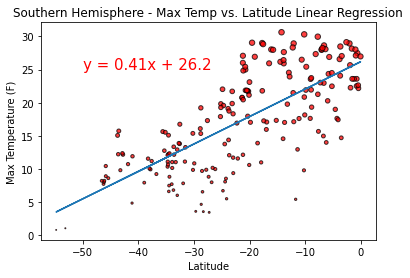

In [59]:
max_s = s_hem["Max Temp"]
lat_s = s_hem["Lat"]

py_slope, py_int, py_r, py_p, py_std_err = st.linregress(lat_s, max_s)
py_fit = py_slope * lat_s + py_int
line_eq = "y = " + str(round(py_slope,2)) + "x + " + str(round(py_int,2))

plt.plot(lat_s,py_fit,"-")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")

plt.scatter(lat_s, max_s, marker="o", facecolors="red", edgecolors="black",
              s=max_s, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

print(f"The correlation coefficient between Max Temp and Latitude Linear Regression is {round(st.pearsonr(max_s, lat_s)[0],2)}")

plt.savefig("SHLatTemp.png", bbox_inches='tight', dpi=600)

#Based on the chart and the r-value, we can clearly see that as you move closer to a 0 latitude, the max temp has an increasing trend

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient between Humidity(%) and Latitude Linear Regression is -0.09


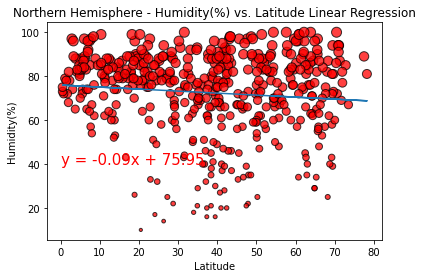

In [53]:
hum_n = n_hem["Humidity"]

py_slope, py_int, py_r, py_p, py_std_err = st.linregress(lat_n, hum_n)
py_fit = py_slope * lat_n + py_int
plt.plot(lat_n,py_fit,"-")
line_eq = "y = " + str(round(py_slope,2)) + "x + " + str(round(py_int,2))
plt.annotate(line_eq,(0,40),fontsize=15,color="red")

plt.scatter(lat_n, hum_n, marker="o", facecolors="red", edgecolors="black",
              s=hum_n, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("Northern Hemisphere - Humidity(%) vs. Latitude Linear Regression")

print(f"The correlation coefficient between Humidity(%) and Latitude Linear Regression is {round(st.pearsonr(hum_n, lat_n)[0],2)}")

plt.savefig("NHHumidLat.png", bbox_inches='tight', dpi=600)

#Based on the chart and the r-value, we see that there is not a clear relationship between humidity and latitude. Most cities in our dataset have humidity levels above 60%.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient between Humidity(%) and Latitude Linear Regression is 0.09


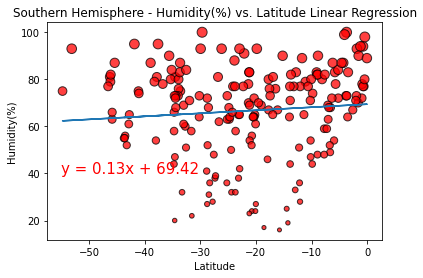

In [54]:
hum_s = s_hem["Humidity"]


py_slope, py_int, py_r, py_p, py_std_err = st.linregress(lat_s, hum_s)
py_fit = py_slope * lat_s + py_int
plt.plot(lat_s,py_fit,"-")
line_eq = "y = " + str(round(py_slope,2)) + "x + " + str(round(py_int,2))
plt.annotate(line_eq,(-55,40),fontsize=15,color="red")

plt.scatter(lat_s, hum_s, marker="o", facecolors="red", edgecolors="black",
              s=hum_s, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("Southern Hemisphere - Humidity(%) vs. Latitude Linear Regression")

print(f"The correlation coefficient between Humidity(%) and Latitude Linear Regression is {round(st.pearsonr(hum_s, lat_s)[0],2)}")

plt.savefig("SHHumidLat.png", bbox_inches='tight', dpi=600)

#Based on the chart and the r-value, we see that there is not a clear relationship between humidity and latitude. Most cities in our dataset have humidity levels above 60%.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient between Cloudiness (%) and Latitude Linear Regression is -0.05


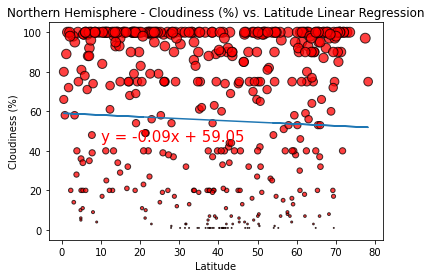

In [51]:
cloud_n = n_hem["Cloudiness"]

py_slope, py_int, py_r, py_p, py_std_err = st.linregress(lat_n, cloud_n)
py_fit = py_slope * lat_n + py_int
plt.plot(lat_n,py_fit,"-")
line_eq = "y = " + str(round(py_slope,2)) + "x + " + str(round(py_int,2))
plt.annotate(line_eq,(10,45),fontsize=15,color="red")

plt.scatter(lat_n, cloud_n, marker="o", facecolors="red", edgecolors="black",
              s=cloud_n, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

print(f"The correlation coefficient between Cloudiness (%) and Latitude Linear Regression is {round(st.pearsonr(cloud_n, lat_n)[0],2)}")

plt.savefig("NHCloudLat.png", bbox_inches='tight', dpi=600)

#Based on the chart and the r-value, we see that there is not a clear relationship between cloudiness and latitude. Many cities in our dataset are clustered together in our chart at cloudiness levels of 100%.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient between Cloudiness (%) and Latitude Linear Regression is -0.19


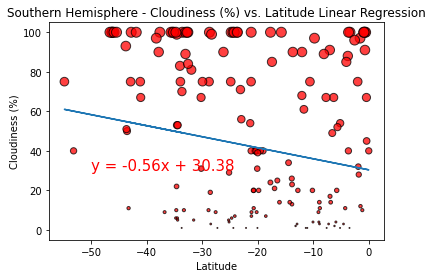

In [52]:
cloud_s = s_hem["Cloudiness"]

py_slope, py_int, py_r, py_p, py_std_err = st.linregress(lat_s, cloud_s)
py_fit = py_slope * lat_s + py_int
plt.plot(lat_s,py_fit,"-")
line_eq = "y = " + str(round(py_slope,2)) + "x + " + str(round(py_int,2))
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")

plt.scatter(lat_s, cloud_s, marker="o", facecolors="red", edgecolors="black",
              s=cloud_s, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

print(f"The correlation coefficient between Cloudiness (%) and Latitude Linear Regression is {round(st.pearsonr(cloud_s, lat_s)[0],2)}")

plt.savefig("SHCloudLat.png", bbox_inches='tight', dpi=600)

#Based on the chart and the r-value, we see that there is not a clear relationship between cloudiness and latitude

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient between Wind Speed (mph) and Latitude Linear Regression is -0.02


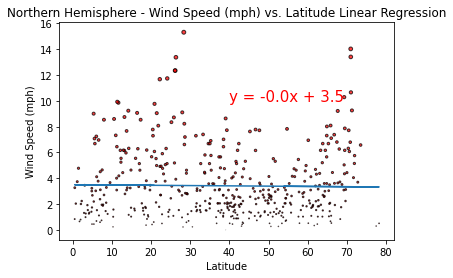

In [50]:
wind_n = n_hem["Wind Speed"]

py_slope, py_int, py_r, py_p, py_std_err = st.linregress(lat_n, wind_n)
py_fit = py_slope * lat_n + py_int
plt.plot(lat_n,py_fit,"-")
line_eq = "y = " + str(round(py_slope,2)) + "x + " + str(round(py_int,2))
plt.annotate(line_eq,(40,10),fontsize=15,color="red")

plt.scatter(lat_n, wind_n, marker="o", facecolors="red", edgecolors="black",
              s=wind_n, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

print(f"The correlation coefficient between Wind Speed (mph) and Latitude Linear Regression is {round(st.pearsonr(wind_n, lat_n)[0],2)}")

plt.savefig("NHWindLat.png", bbox_inches='tight', dpi=600)

#Based on the chart and the r-value, we see that there is not a clear relationship between wind speed and latitude. Most cities in our dataset displayed wind speeds of less than 6mph.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient between Wind Speed (mph) and Latitude Linear Regression is -0.04


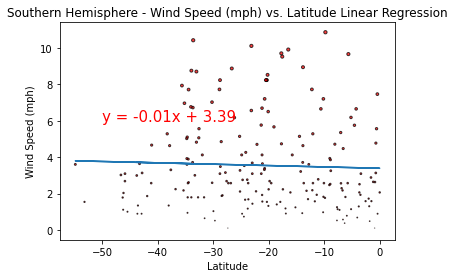

In [49]:
wind_s = s_hem["Wind Speed"]

py_slope, py_int, py_r, py_p, py_std_err = st.linregress(lat_s, wind_s)
py_fit = py_slope * lat_s + py_int
plt.plot(lat_s,py_fit,"-")
line_eq = "y = " + str(round(py_slope,2)) + "x + " + str(round(py_int,2))
plt.annotate(line_eq,(-50,6),fontsize=15,color="red")

plt.scatter(lat_s, wind_s, marker="o", facecolors="red", edgecolors="black",
              s=wind_s, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

print(f"The correlation coefficient between Wind Speed (mph) and Latitude Linear Regression is {round(st.pearsonr(wind_s, lat_s)[0],2)}")

plt.savefig("SHWindLat.png", bbox_inches='tight', dpi=600)

#Based on the chart and the r-value, we see that there is not a clear relationship between wind speed and latitude. Most cities in our dataset displayed wind speeds of less than 6mph.